In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

In [ ]:
#The target is the outcome column
#The input data is the rest of the columns except outcome
X = dataset.drop('Outcome', axis=1).values   #Input
y = dataset['Outcome'].values                #Label

In [ ]:
print( X.shape, y.shape )

(768, 8) (768,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print( 'train shape {tr}, and its labels {la}'.format(tr= X_train.shape, la = y_train.shape)   )
print( 'test  shape {te}, and its labels {la}'.format(te= X_test.shape, la = y_test.shape)   )

train shape (537, 8), and its labels (537,)
test  shape (231, 8), and its labels (231,)


In [ ]:
# # Create a k-NN classifier with 4 neighbors
# knn = KNeighborsClassifier()

# #Fit the classifier to the training data
# knn.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

#Print the accuracy
print(knn.score(X_test, y_test))
print("Accuracy = {} %".format(round(knn.score(X_test, y_test),2) * 100))

0.6753246753246753
Accuracy = 68.0 %


In [ ]:
#Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = []
test_accuracy = []

#Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy.append( knn.score(X_train, y_train) )
    #Compute accuracy on the test set
    test_accuracy.append( knn.score(X_test, y_test) )

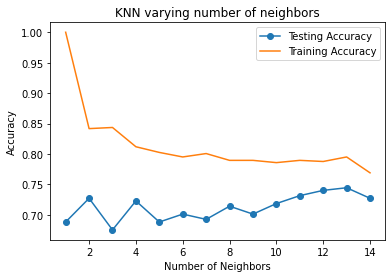

In [ ]:
#Generate plot
plt.title('KNN varying number of neighbors')
plt.plot(neighbors, test_accuracy, 'o-', label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13).fit(X_train, y_train)
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[128  23]
 [ 36  44]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



[[128  23]
 [ 36  44]]


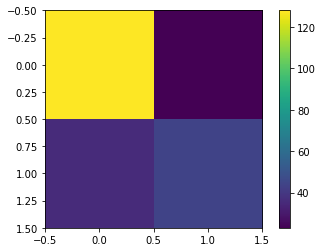

In [ ]:
print(confusion_matrix(y_test, y_pred))

plt.imshow( confusion_matrix(y_test, y_pred) )
plt.colorbar()
plt.show()

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(537, 8) (537,) (231, 8) (231,)


## Surpport Vector Machine 
Classification (SVC) 

In [ ]:
from sklearn import svm

clf = svm.SVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)


print(clf.score(X_test, y_test))
print("Accuracy = {} %".format(round(clf.score(X_test, y_test),2) * 100))

0.7359307359307359
Accuracy = 74.0 %


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [4]:
print(iris_X[0], iris_y)

[5.1 3.5 1.4 0.2] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Pipe line & Hyperparameter setting

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.svm import SVC



iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

# X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.20)

# clf = SVC().fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# print(clf.score(X_test, y_test))
# print("Accuracy = {} %".format(round(clf.score(X_test, y_test),2) * 100))

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('normalize', MinMaxScaler()))
estimators.append(('clf', SVC(random_state=10)) )
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())







0.9583333333333333


In [8]:
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

pipe_svc = Pipeline([('scale', StandardScaler()), ('clf', SVC(random_state=10))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [ {'clf__C': param_range, 'clf__kernel': ['linear']}, \
              {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy',\
                  cv=10, n_jobs=1) 
gs = gs.fit(X_train, y_train)
print(gs.best_score_) 
print(gs.best_params_)

c = gs.best_estimator_ 

0.975
{'clf__C': 1.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


In [11]:
y_pred = c.predict(X_test)
print(y_pred)

[2 0 1 2 2 2 2 0 2 1 1 2 1 0 1 1 2 2 1 0 1 0 2 0 0 1 2 1 1 0]


(1797, 64) (1797,) 6
9 0


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

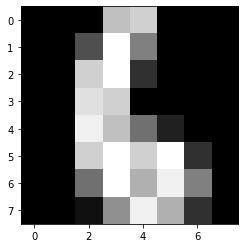

In [27]:
from sklearn import datasets
import matplotlib.pyplot as plt
# x,y = datasets.load_boston(return_X_y=True)
# x,y = datasets.load_iris(return_X_y=True)
x,y = datasets.load_digits(return_X_y=True)
# x,y = datasets.load_diabetes(return_X_y=True)

print(x.shape, y.shape, y[6])
print(max(y), min(y))

plt.imshow(x[6].reshape((8,8)), cmap='gray')
plt.plot